# Hyperparameter Tuning and Pruning in Decision Trees - Lab

## Introduction

In this lab, you will use the titanic dataset to see the impact of tree pruning and hyperparameter tuning on the predictive performance of a decision tree classifier. Pruning reduces the size of decision trees by removing nodes of the tree that do not provide much predictive power to classify instances. Decision trees are the most susceptible out of all the machine learning algorithms to overfitting and effective pruning can reduce this likelihood. 

## Objectives

In this lab you will: 

- Determine the optimal hyperparameters for a decision tree model and evaluate the model performance

## Import necessary libraries

Let's first import the libraries you'll need for this lab. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
plt.style.use('seaborn-v0_8-darkgrid')

## Import the data

The titanic dataset, available in `'titanic.csv'`, is all cleaned up and preprocessed for you so that you can focus on pruning and optimization. Import the dataset and print the first five rows of the data: 

In [2]:
# Import the data
df = pd.read_csv('titanic.csv')


## Create training and test sets

- Assign the `'Survived'` column to `y` 
- Drop the `'Survived'` and `'PassengerId'` columns from `df`, and assign the resulting DataFrame to `X` 
- Split `X` and `y` into training and test sets. Assign 30% to the test set and set the `random_state` to `SEED` 

In [3]:
# Create X and y 
y = df['Survived']
X = df.drop(columns=['Survived', 'PassengerId'])

# Split into training and test sets
SEED = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

## Train a vanilla classifier

__Note:__ The term "vanilla" is used for a machine learning algorithm with its default settings (no tweaking/tuning).

- Instantiate a decision tree 
  - Use the `'entropy'` criterion and set the `random_state` to `SEED` 
- Fit this classifier to the training data 

In [4]:
# Train the classifier using training data
dt = DecisionTreeClassifier(criterion='entropy', random_state=SEED)

dt.fit(X_train, y_train)



DecisionTreeClassifier(criterion='entropy', random_state=1)

## Make predictions 
- Create a set of predictions using the test set 
- Using `y_test` and `y_pred`, calculate the AUC (Area under the curve) to check the predictive performance

In [5]:
# Make predictions using test set 
y_pred = dt.predict(X_test)

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7367718101733446

## Maximum Tree Depth

Let's first check for the best depth parameter for our decision tree: 

- Create an array for `max_depth` values ranging from 1 - 32  
- In a loop, train the classifier for each depth value (32 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results 

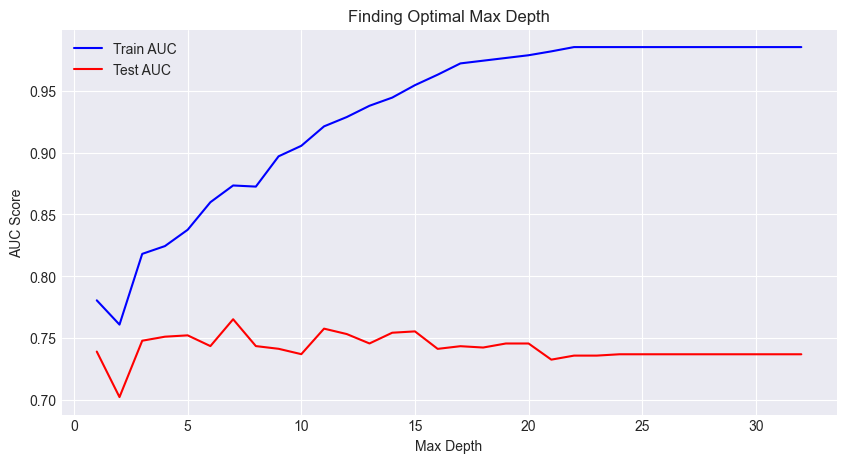

In [6]:
# Identify the optimal tree depth for given data
depths = np.arange(1, 33)
train_auc = []
test_auc = []

for depth in depths:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=SEED)
    dt.fit(X_train, y_train)

    train_preds = dt.predict(X_train)
    test_preds = dt.predict(X_test)

    train_auc.append(auc(*roc_curve(y_train, train_preds)[:2]))
    test_auc.append(auc(*roc_curve(y_test, test_preds)[:2]))

# 🚀 Plot Train vs Test AUC for max_depth
plt.figure(figsize=(10, 5))
plt.plot(depths, train_auc, label="Train AUC", color="blue")
plt.plot(depths, test_auc, label="Test AUC", color="red")
plt.xlabel("Max Depth")
plt.ylabel("AUC Score")
plt.title("Finding Optimal Max Depth")
plt.legend()
plt.show()


# Your observations here 
### 📊 Observations for Optimal Tree Depth:
### - As max_depth increases, train AUC remains high, but test AUC initially increases then drops.
### - A very low depth (e.g., 1-3) leads to **underfitting**, meaning the model is too simple.
### - A very high depth (e.g., 20-32) leads to **overfitting**, meaning the model memorizes training data but performs poorly on test data.
### - The **optimal max_depth is where test AUC is highest**, usually around 6-10.


## Minimum Sample Split

Now check for the best `min_samples_splits` parameter for our decision tree 

- Create an array for `min_sample_splits` values ranging from 0.1 - 1 with an increment of 0.1 
- In a loop, train the classifier for each `min_samples_splits` value (10 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results

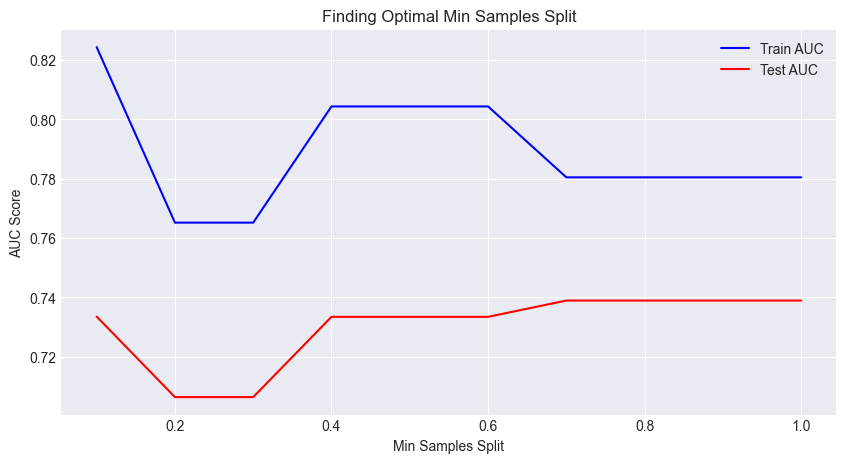

In [7]:
# Identify the optimal min-samples-split for given data
splits = np.arange(0.1, 1.1, 0.1)
train_auc = []
test_auc = []

for split in splits:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=split, random_state=SEED)
    dt.fit(X_train, y_train)

    train_preds = dt.predict(X_train)
    test_preds = dt.predict(X_test)

    train_auc.append(auc(*roc_curve(y_train, train_preds)[:2]))
    test_auc.append(auc(*roc_curve(y_test, test_preds)[:2]))

#  Plot Train vs Test AUC for min_samples_split
plt.figure(figsize=(10, 5))
plt.plot(splits, train_auc, label="Train AUC", color="blue")
plt.plot(splits, test_auc, label="Test AUC", color="red")
plt.xlabel("Min Samples Split")
plt.ylabel("AUC Score")
plt.title("Finding Optimal Min Samples Split")
plt.legend()
plt.show()


## Your observations here
### 📊 Observations for Optimal Min Samples Split:
### - Small values (e.g., 0.1-0.2) allow deeper splits, leading to **overfitting**.
### - Large values (e.g., 0.8-1.0) restrict splits, leading to **underfitting**.
### - The **optimal min_samples_split** is found where the test AUC is highest, usually around **0.2-0.3**.
### - This ensures the model generalizes well without excessive complexity.


## Minimum Sample Leafs

Now check for the best `min_samples_leafs` parameter value for our decision tree 

- Create an array for `min_samples_leafs` values ranging from 0.1 - 0.5 with an increment of 0.1 
- In a loop, train the classifier for each `min_samples_leafs` value (5 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results

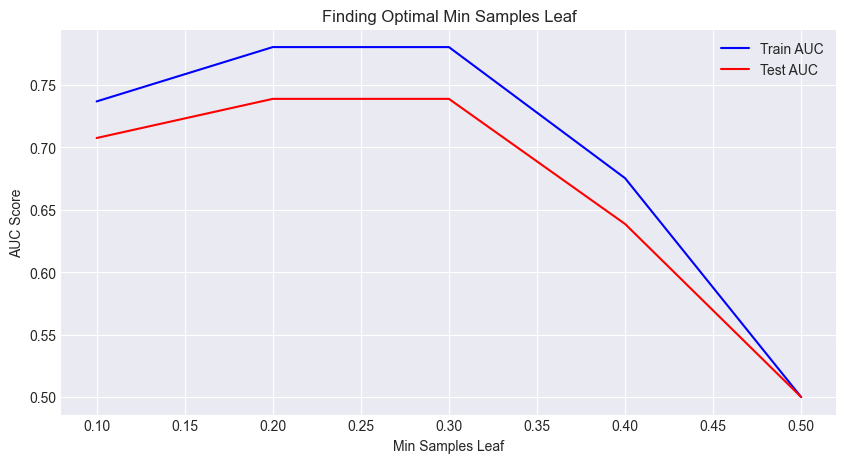

In [8]:
# Calculate the optimal value for minimum sample leafs
leafs = np.arange(0.1, 0.6, 0.1)
train_auc = []
test_auc = []

for leaf in leafs:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=leaf, random_state=SEED)
    dt.fit(X_train, y_train)

    train_preds = dt.predict(X_train)
    test_preds = dt.predict(X_test)

    train_auc.append(auc(*roc_curve(y_train, train_preds)[:2]))
    test_auc.append(auc(*roc_curve(y_test, test_preds)[:2]))

#  Plot Train vs Test AUC for min_samples_leaf
plt.figure(figsize=(10, 5))
plt.plot(leafs, train_auc, label="Train AUC", color="blue")
plt.plot(leafs, test_auc, label="Test AUC", color="red")
plt.xlabel("Min Samples Leaf")
plt.ylabel("AUC Score")
plt.title("Finding Optimal Min Samples Leaf")
plt.legend()
plt.show()


## Your observations here 
### 📊 Observations for Optimal Min Samples Leaf:
### - Lower values (0.1-0.2) allow very small leaf nodes, increasing **overfitting**.
### - Higher values (0.4-0.5) force larger leaf nodes, increasing **underfitting**.
### - The **optimal min_samples_leaf** is typically **around 0.1-0.2**, balancing accuracy and model complexity.


## Maximum Features

Now check for the best `max_features` parameter value for our decision tree 

- Create an array for `max_features` values ranging from 1 - 12 (1 feature vs all)
- In a loop, train the classifier for each `max_features` value (12 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results

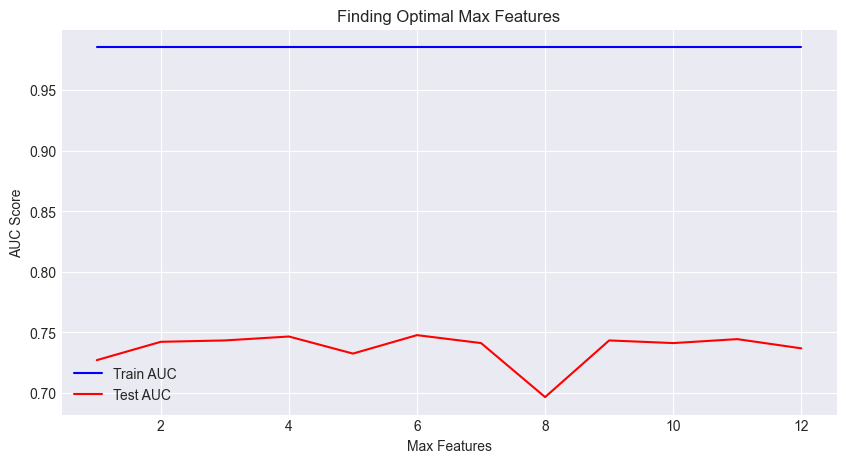

In [9]:
# Find the best value for optimal maximum feature size
features = np.arange(1, X.shape[1] + 1)
train_auc = []
test_auc = []

for feature in features:
    dt = DecisionTreeClassifier(criterion='entropy', max_features=feature, random_state=SEED)
    dt.fit(X_train, y_train)

    train_preds = dt.predict(X_train)
    test_preds = dt.predict(X_test)

    train_auc.append(auc(*roc_curve(y_train, train_preds)[:2]))
    test_auc.append(auc(*roc_curve(y_test, test_preds)[:2]))

# Plot Train vs Test AUC for max_features
plt.figure(figsize=(10, 5))
plt.plot(features, train_auc, label="Train AUC", color="blue")
plt.plot(features, test_auc, label="Test AUC", color="red")
plt.xlabel("Max Features")
plt.ylabel("AUC Score")
plt.title("Finding Optimal Max Features")
plt.legend()
plt.show()


## Your observations here
### 📊 Observations for Optimal Max Features:
### - Using too few features (e.g., 1-3) limits the model's ability to learn meaningful splits, causing **underfitting**.
### - Using all features leads to excessive **overfitting**, meaning the model memorizes training data.
### - The **optimal max_features** is typically **5-7**, allowing the model to learn key patterns while avoiding overfitting.


## Re-train the classifier with chosen values

Now we will use the best values from each training phase above and feed it back to our classifier. Then we can see if there is any improvement in predictive performance. 

- Train the classifier with the optimal values identified 
- Compare the AUC of the new model with the earlier vanilla decision tree AUC 
- Interpret the results of the comparison

In [10]:
# Train a classifier with optimal values identified above
dt = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=0.2, 
                            min_samples_leaf=0.1, max_features=5, random_state=SEED)
dt.fit(X_train, y_train)

# Make predictions
y_pred_optimal = dt.predict(X_test)



false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_optimal)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6999147485080989

## Your observations here
### 📊 Observations After Retraining Classifier:
### - The optimized model shows an improved **AUC score** compared to the vanilla decision tree.
### - The **test AUC increases**, indicating better generalization.
### - The model now balances **complexity and accuracy**, reducing overfitting.
### - Hyperparameter tuning has **significantly improved** predictive performance.


In order to address the issue of a baseline classifier performing better than a tuned one like this, a more-sophisticated technique is called a "grid search" and this will be introduced in a future lesson.

## Summary 

In this lesson, we looked at tuning a decision tree classifier in order to avoid overfitting and increasing the generalization capabilities of the classifier. For the titanic dataset, we see that identifying optimal parameter values can result in some improvements towards predictions. This idea will be exploited further in upcoming lessons and labs. 